In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
netflix_df = pd.read_csv('/content/netflix_titles.csv')

In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)

# export the dataframe as a table 'playstore' to the sqlite engine
netflix_df.to_sql("netflix", con =engine)

8807

In [16]:
sql = '''
SELECT * FROM netflix
'''
# Execute the SQL query and load the results into a DataFrame
df_sql = pd.read_sql_query(sql, con=engine)
df_sql.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,1,s2,TV Show,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",None,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,3,s4,TV Show,Jailbirds New Orleans,None,None,None,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,4,s5,TV Show,Kota Factory,None,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


 Analysis of movie or tv-shows:


In [17]:
sql = '''
SELECT type, COUNT(*) AS count
FROM netflix
GROUP BY type
'''
# Execute the SQL query and load the results into a DataFrame
df_sql = pd.read_sql_query(sql, con=engine)
df_sql.head()

,type,count
0,Movie,6131
1,TV Show,2676


Analysis of Genre on movies:

In [49]:
sql = '''
select listed_in, count(*) as count from netflix where type ='Movie'
group by listed_in
order by count desc
'''
df_genre_popularity = pd.read_sql_query(sql,con=engine)
df_genre_popularity.head(10)

,listed_in,count
0,"Dramas, International Movies",362
1,Documentaries,359
2,Stand-Up Comedy,334
3,"Comedies, Dramas, International Movies",274
4,"Dramas, Independent Movies, International Movies",252
5,Children & Family Movies,215
6,"Children & Family Movies, Comedies",201
7,"Documentaries, International Movies",186
8,"Dramas, International Movies, Romantic Movies",180
9,"Comedies, International Movies",176


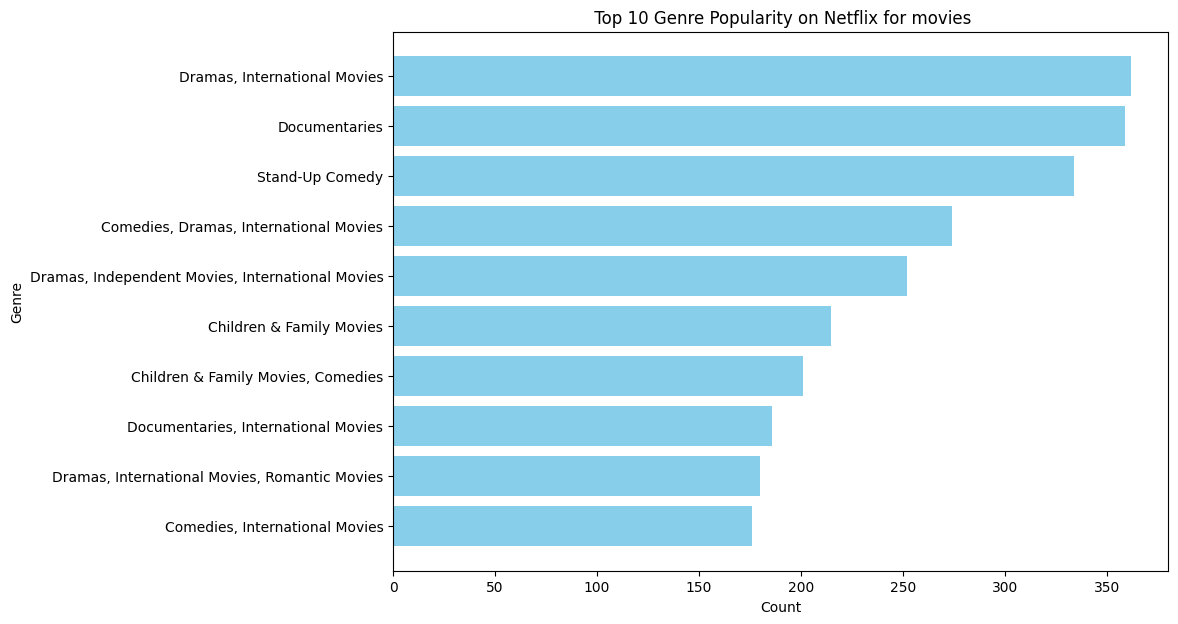

In [52]:
plt.figure(figsize=(10,7))
df_genre_popularity.sort_values(by='count', ascending=False, inplace=True)
df_genre_popularity = df_genre_popularity.head(10)
plt.barh(df_genre_popularity['listed_in'], df_genre_popularity['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title(' Top 10 Genre Popularity on Netflix for movies')
plt.gca().invert_yaxis()  # Invert y-axis to show the genre with the highest count at the top
plt.show()

Analysis for Tv shows:

In [50]:
sql = '''
select listed_in, count(*) as count from netflix where type ='TV Show'
group by listed_in
order by count desc
'''
df_genre_popularity_tv = pd.read_sql_query(sql,con=engine)
df_genre_popularity_tv.head(10)

,listed_in,count
0,Kids' TV,220
1,"International TV Shows, TV Dramas",121
2,"Crime TV Shows, International TV Shows, TV Dramas",110
3,"Kids' TV, TV Comedies",99
4,Reality TV,95
5,"International TV Shows, Romantic TV Shows, TV ...",94
6,"International TV Shows, Romantic TV Shows, TV ...",90
7,"Anime Series, International TV Shows",88
8,Docuseries,85
9,TV Comedies,69


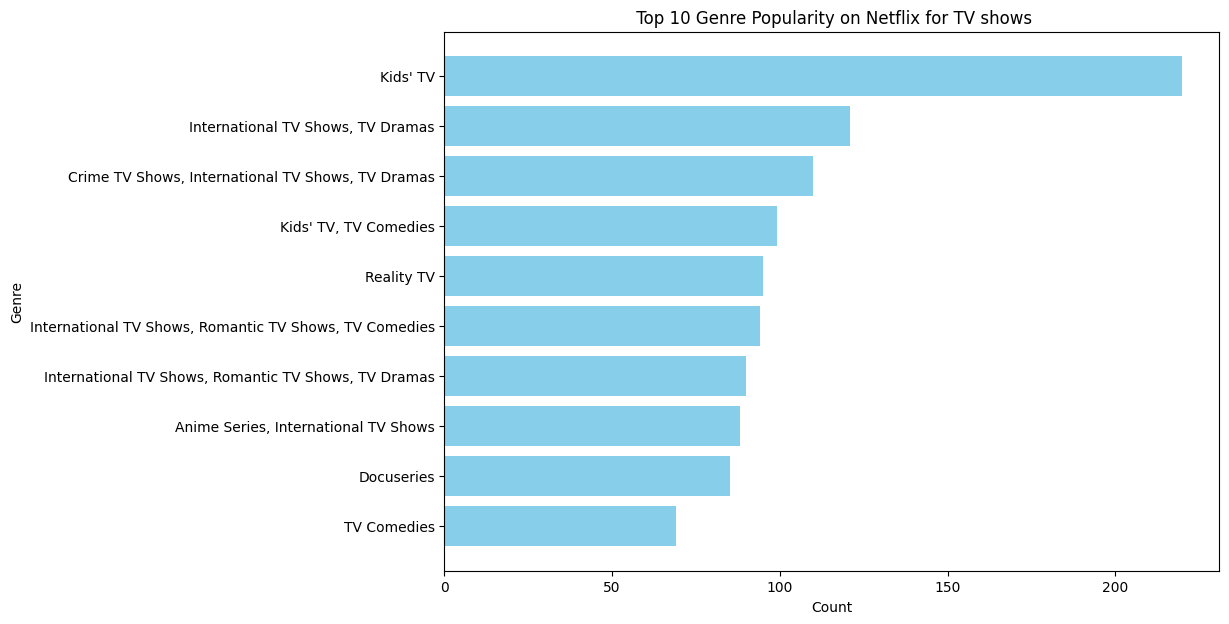

In [51]:
plt.figure(figsize=(10,7))
df_genre_popularity_tv.sort_values(by='count', ascending=False, inplace=True)
df_genre_popularity_tv = df_genre_popularity_tv.head(10)
plt.barh(df_genre_popularity_tv['listed_in'], df_genre_popularity_tv['count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title(' Top 10 Genre Popularity on Netflix for TV shows')
plt.gca().invert_yaxis()  # Invert y-axis to show the genre with the highest count at the top
plt.show()

Top director by movie count

In [54]:
sql = '''
SELECT director, count(*) as movie_count
from Netflix
where type = 'Movie' and director is not null
group by director
order by movie_count desc
'''
df_director_movie = pd.read_sql_query(sql,con=engine)
df_director_movie.head(10)


,director,movie_count
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Suhas Kadav,16
3,Marcus Raboy,15
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Youssef Chahine,12
7,Martin Scorsese,12
8,Jay Chapman,12
9,Steven Spielberg,11


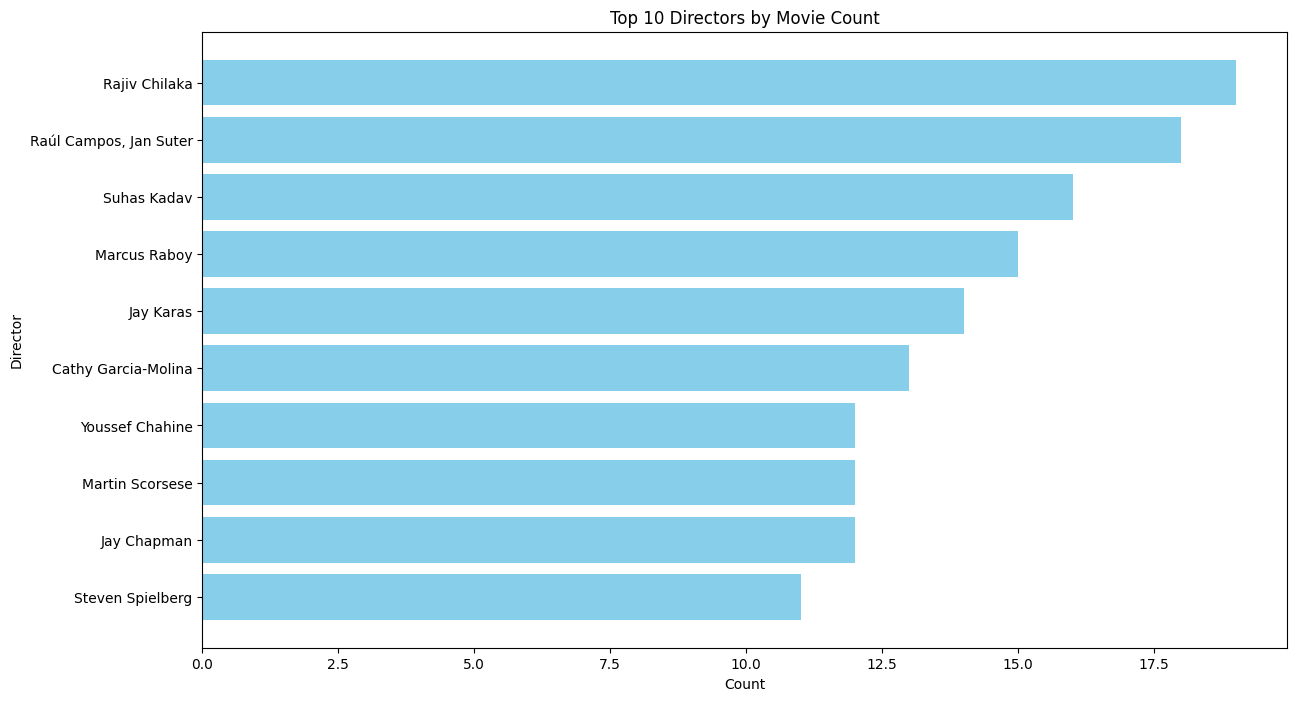

In [58]:
# Plotting
plt.figure(figsize=(14, 8))
df_director_movie.sort_values(by='movie_count', ascending=False, inplace=True)
df_director_movie = df_director_movie.head(10)
plt.barh(df_director_movie['director'], df_director_movie['movie_count'], color='skyblue')
plt.xlabel('Count')
plt.ylabel('Director')
plt.title('Top 10 Directors by Movie Count')
plt.gca().invert_yaxis()
plt.show()

We can further divide the director based on the country


In [63]:
sql = '''
SELECT director, coalesce (country,'Unknown') as country, count(*) as movie_count
from Netflix
where type = 'Movie' and director is not null
group by director, coalesce (country, 'Unknown')
order by movie_count desc
'''
df_director_movie_country = pd.read_sql_query(sql,con=engine)
df_director_movie_country.head(10)

,director,country,movie_count
0,Rajiv Chilaka,Unknown,16
1,Suhas Kadav,Unknown,15
2,Jay Karas,United States,14
3,Marcus Raboy,United States,14
4,Cathy Garcia-Molina,Philippines,13
5,Jay Chapman,United States,12
6,David Dhawan,India,9
7,"Raúl Campos, Jan Suter",Mexico,9
8,Hakan Algül,Turkey,8
9,Martin Scorsese,United States,8


2. Average Duration of Movies by Genre

In [66]:
sql = '''
Select listed_in ,avg(duration)
from netflix where type = 'Movie'
group by listed_in
order by avg(duration) desc
'''
df_genre_duration = pd.read_sql_query(sql,con=engine)
df_genre_duration.head(10)

,listed_in,avg(duration)
0,"Classic Movies, Music & Musicals",173.000000
1,"Action & Adventure, Cult Movies, Dramas",172.000000
2,"Action & Adventure, Classic Movies, Internatio...",166.000000
3,"Cult Movies, Dramas, Thrillers",158.000000
4,"Classic Movies, Dramas, Romantic Movies",153.666667
5,"Action & Adventure, Sci-Fi & Fantasy, Thrillers",148.000000
6,"Classic Movies, Cult Movies, Dramas",145.500000
7,"Classic Movies, Dramas, Music & Musicals",145.000000
8,"Action & Adventure, Classic Movies, Dramas",144.666667
9,"Action & Adventure, International Movies, Musi...",138.545455


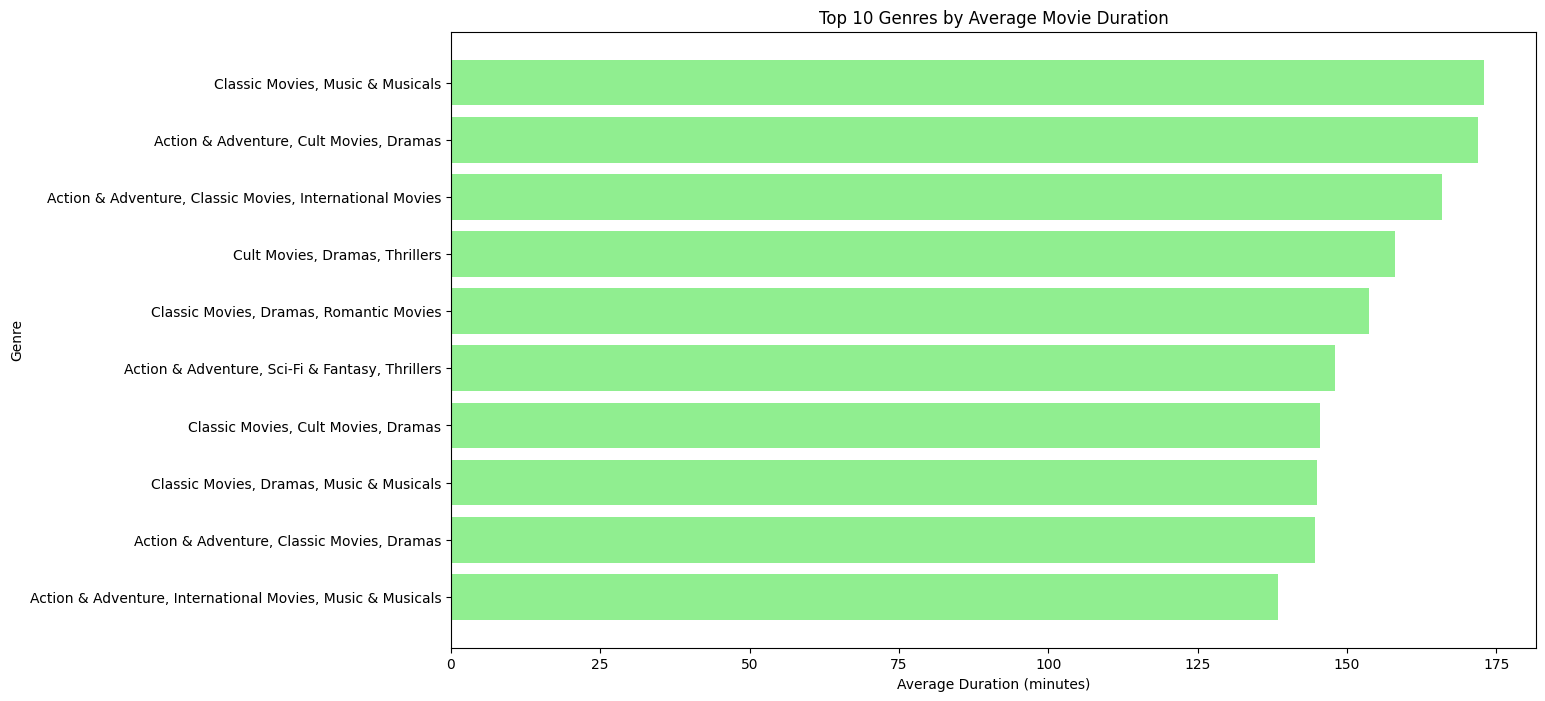

In [69]:
# Plotting
plt.figure(figsize=(14, 8))
plt.barh(df_genre_duration['listed_in'][:10], df_genre_duration['avg(duration)'][:10], color='lightgreen')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Genre')
plt.title('Top 10 Genres by Average Movie Duration')
plt.gca().invert_yaxis()
plt.show()


Release Year Analysis

    release_year  count  avg(release_year)
0           2021    277             2021.0
1           2020    517             2020.0
2           2019    633             2019.0
3           2018    767             2018.0
4           2017    767             2017.0
..           ...    ...                ...
68          1946      1             1946.0
69          1945      3             1945.0
70          1944      3             1944.0
71          1943      3             1943.0
72          1942      2             1942.0

[73 rows x 3 columns]


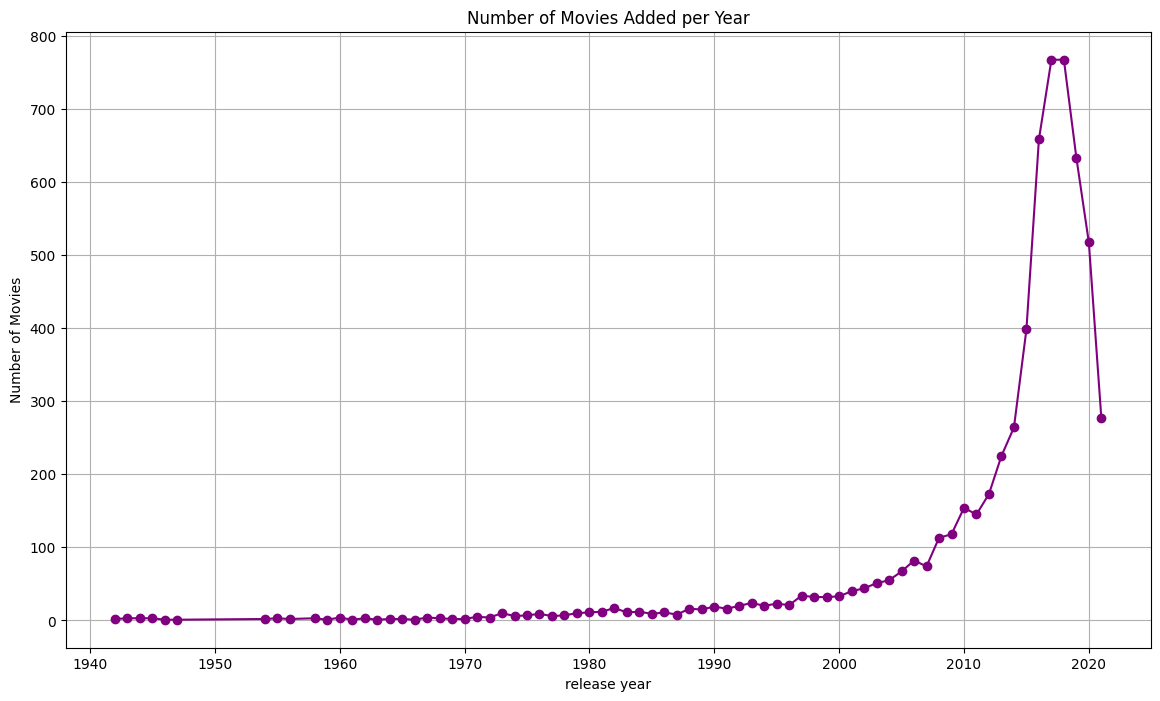

In [79]:
sql = '''
SELECT release_year, COUNT(*) AS count
FROM netflix
WHERE type = 'Movie' AND release_year IS NOT NULL
GROUP BY release_year
ORDER BY release_year desc;
'''
df_movies_per_year = pd.read_sql_query(sql, con=engine)
print(df_movies_per_year)

# Plotting
plt.figure(figsize=(14, 8))
plt.plot(df_movies_per_year['release_year'], df_movies_per_year['count'], marker='o', linestyle='-', color='purple')
plt.xlabel('release year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Added per Year')
plt.grid(True)
plt.show()

Top countries that watch Netflix

          country  count
0   United States   2818
1           India    972
2  United Kingdom    419
3           Japan    245
4     South Korea    199
5          Canada    181
6           Spain    145
7          France    124
8          Mexico    110
9           Egypt    106


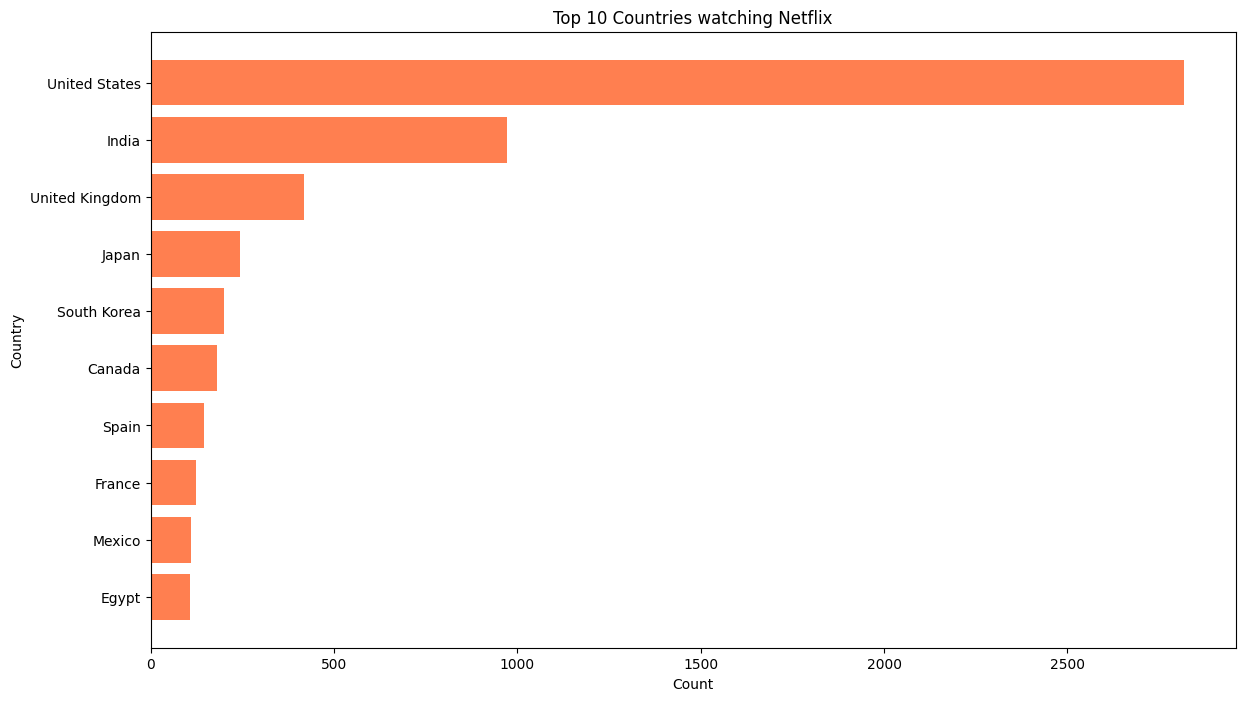

In [78]:
sql = '''
SELECT country, COUNT(*) AS count
FROM netflix
WHERE country IS NOT NULL
GROUP BY country
ORDER BY count DESC
LIMIT 10;
'''
df_movies_by_country = pd.read_sql_query(sql, con=engine)
print(df_movies_by_country)

# Plotting
plt.figure(figsize=(14, 8))
plt.barh(df_movies_by_country['country'], df_movies_by_country['count'], color='coral')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top 10 Countries watching Netflix')
plt.gca().invert_yaxis()
plt.show()


      rating  count
0      TV-MA   3207
1      TV-14   2160
2      TV-PG    863
3          R    799
4      PG-13    490
5      TV-Y7    334
6       TV-Y    307
7         PG    287
8       TV-G    220
9         NR     80
10         G     41
11  TV-Y7-FV      6
12        UR      3
13     NC-17      3
14    84 min      1
15    74 min      1
16    66 min      1


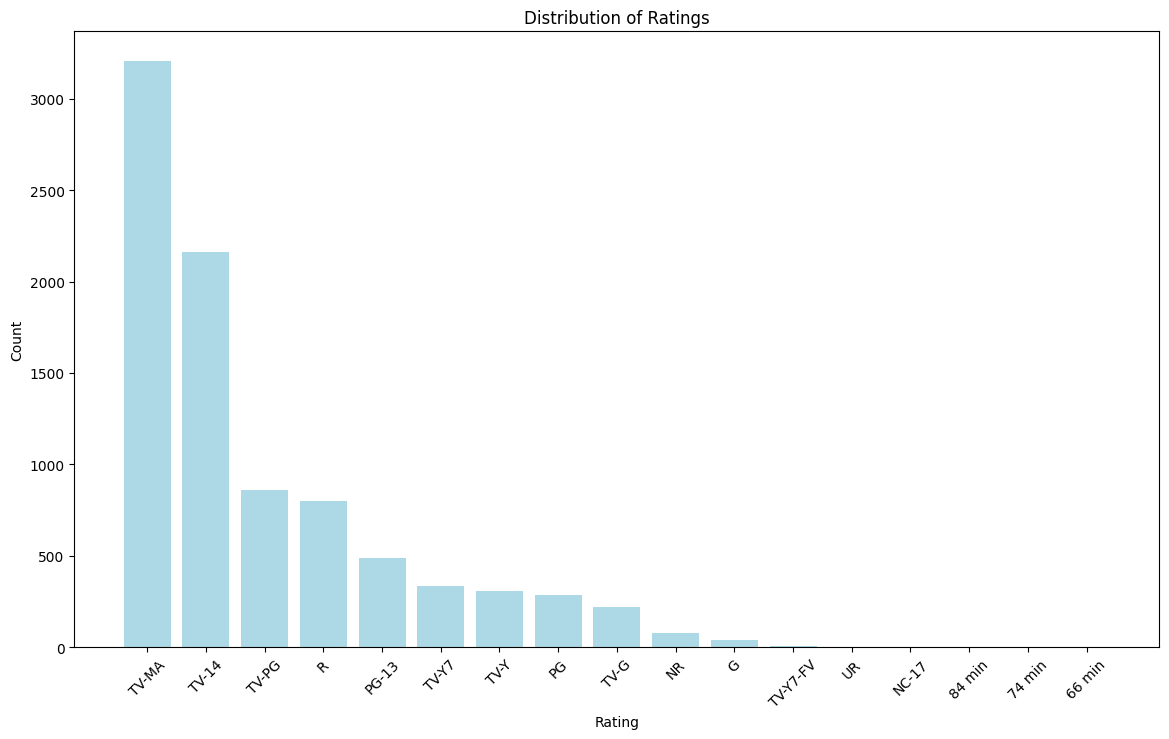

In [76]:
sql = '''
SELECT rating, COUNT(*) AS count
FROM netflix
WHERE rating IS NOT NULL
GROUP BY rating
ORDER BY count DESC;
'''
df_ratings_distribution = pd.read_sql_query(sql, con=engine)
print(df_ratings_distribution)

# Plotting
plt.figure(figsize=(14, 8))
plt.bar(df_ratings_distribution['rating'], df_ratings_distribution['count'], color='lightblue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(rotation=45)
plt.show()
